In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('telecom_users.csv')
df.set_index('customerID', drop = True, inplace = True)
df.drop('Unnamed: 0', axis = 1,inplace = True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


# Exploratory Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5986 entries, 7010-BRBUU to 4795-UXVCJ
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null 

In [107]:
#find na values
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [24]:
from sklearn.model_selection import train_test_split

#separate predictors from label
X = df.drop('Churn', axis = 1)
y = df[['Churn']]

#identify categorical variables
X_cat = ['gender',
        'SeniorCitizen',
        'Partner',
        'PhoneService',
        'MultipleLines',
        'InternetService',
        'OnlineSecurity',
        'OnlineBackup',
        'DeviceProtection',
        'TechSupport',
        'StreamingTV',
        'StreamingMovies',
        'Contract',
        'PaperlessBilling',
        'PaymentMethod']


In [12]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95
5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3
8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05


### Histogram for each of the continuous variable

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>, <AxesSubplot:>]],
      dtype=object)

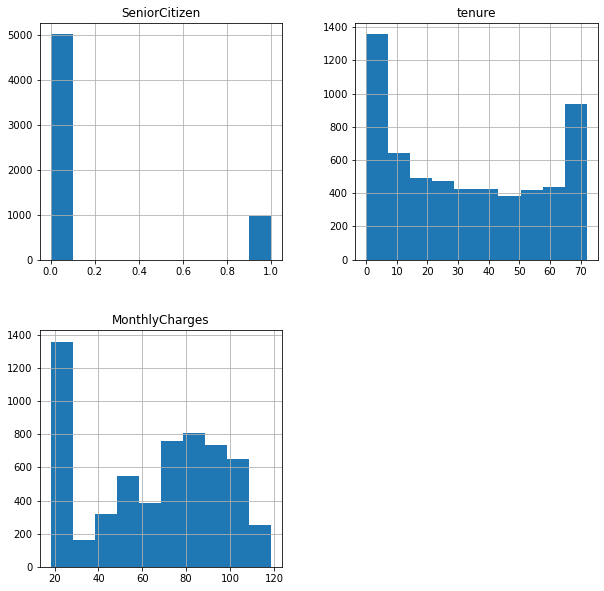

In [34]:
df.hist(figsize = (10,10))

### Plot pie chart for each of the categorical variables

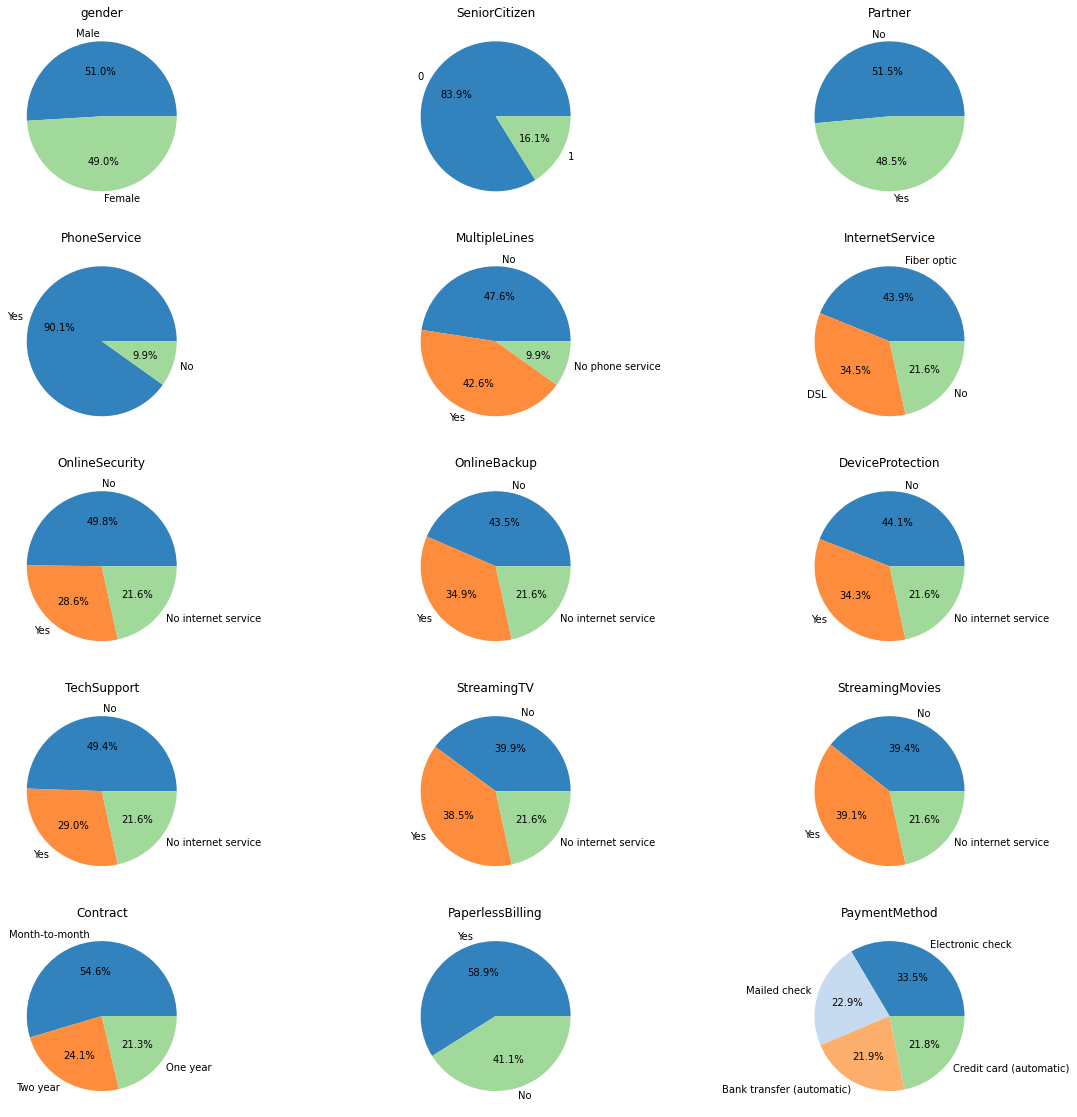

In [72]:
colors = plt.cm.viridis

fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (20,20))
for i, ax in enumerate(axes.flatten()):
    x = df[X_cat].iloc[:,i].value_counts(normalize = True)
    slices = len(list(x.index))
    colormap = plt.cm.tab20c
    colors = colormap(np.linspace(0., 0.5, slices))

    ax.pie(x,
        autopct='%1.1f%%',
        labels = list(x.index),
        colors = colors)
    ax.set_title(list(df[X_cat].columns)[i])
plt.show()

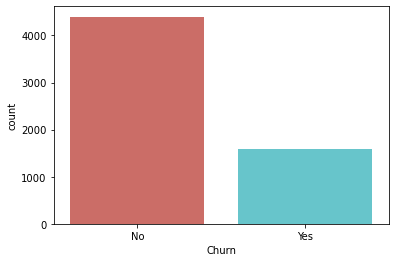

No     0.734881
Yes    0.265119
Name: Churn, dtype: float64


In [92]:
df.groupby('Churn').mean()

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
No,0.128211,37.599682,61.424506
Yes,0.253308,18.246377,74.164871


### Correlation

<AxesSubplot:>

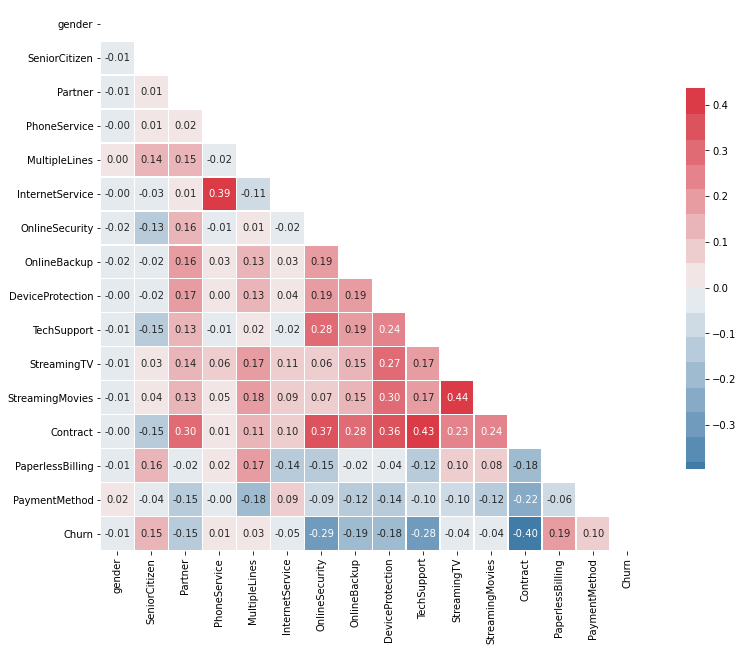

In [87]:
####################categorical data####################
#convert text to numbers for each categorical variable
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() 
df_categorical_mod = df.copy() #create copy of df
for x in df_categorical_mod.columns:
    if df_categorical_mod[x].dtypes =='object':
        df_categorical_mod[x]=label_encoder.fit_transform(df_categorical_mod[x].astype(str))

#create correlation matrix of categorical columns including Churn
corr = df_categorical_mod[['gender',
        'SeniorCitizen',
        'Partner',
        'PhoneService',
        'MultipleLines',
        'InternetService',
        'OnlineSecurity',
        'OnlineBackup',
        'DeviceProtection',
        'TechSupport',
        'StreamingTV',
        'StreamingMovies',
        'Contract',
        'PaperlessBilling',
        'PaymentMethod',
        'Churn']].corr() 

#elaborate heatmap, masking upper triangle of matrix 
mask = np.zeros_like(corr,dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize = (15,10)) #create figure and axis 

cmap = sns.diverging_palette(240, 10, n = 16) #create custome palette
sns.heatmap(corr,
             mask = mask,
             cmap = cmap, 
             center = 0, 
             square = True, 
             linewidths = 0.5, 
             cbar_kws={'shrink':0.7}, #shrink legend
             annot = True, #add values
             fmt='.2f') #format values to two decimals

In [89]:
corr['Churn']

gender             -0.009548
SeniorCitizen       0.150097
Partner            -0.146840
PhoneService        0.009421
MultipleLines       0.034943
InternetService    -0.047198
OnlineSecurity     -0.290306
OnlineBackup       -0.193851
DeviceProtection   -0.180120
TechSupport        -0.277261
StreamingTV        -0.037609
StreamingMovies    -0.039100
Contract           -0.396446
PaperlessBilling    0.188996
PaymentMethod       0.103927
Churn               1.000000
Name: Churn, dtype: float64

# Convert text variables into numbers

In [108]:
df_telco = df.copy() #create copy of dataframe 

df_telco['gender'] = label_encoder.fit_transform(df_telco['gender'])                                        # Gender
df_telco['Partner'] = label_encoder.fit_transform(df_telco['gender'])                                       # Partner
df_telco['Dependents'] = label_encoder.fit_transform(df_telco['gender'])                                    # Dependents
df_telco['PhoneService'] = label_encoder.fit_transform(df_telco['PhoneService'])                            # PhoneService
df_telco['MultipleLines'] = df_telco['MultipleLines'].apply(lambda x : 1 if x == 'Yes' else 0)              # MultipleLines
df_telco['InternetService'] = df_telco['InternetService'].apply(lambda x : 0 if x == 'No' else 1)           # Internet Service
df_telco['OnlineSecurity'] = df_telco['OnlineSecurity'].apply(lambda x : 1 if x == 'Yes' else 0)            # OnlineSecurity
df_telco['OnlineBackup'] = df_telco['OnlineBackup'].apply(lambda x : 1 if x == 'Yes' else 0)                # OnlineBackup
df_telco['DeviceProtection'] = df_telco['DeviceProtection'].apply(lambda x : 1 if x == 'Yes' else 0)        # DeviceProtection
df_telco['TechSupport'] = df_telco['TechSupport'].apply(lambda x : 1 if x == 'Yes' else 0)                  # TechSupport
df_telco['StreamingTV'] = df_telco['StreamingTV'].apply(lambda x : 1 if x == 'Yes' else 0)                  # StreamingTV
df_telco['StreamingMovies'] = df_telco['StreamingMovies'].apply(lambda x : 1 if x == 'Yes' else 0)          # DeviceProtection
df_telco['Contract'] = label_encoder.fit_transform(df_telco['Contract'])                                    # Contract
df_telco['PaperlessBilling'] = label_encoder.fit_transform(df_telco['PaperlessBilling'])                    # PaperlessBilling
df_telco['PaymentMethod'] = label_encoder.fit_transform(df_telco['PaymentMethod'])                          # PaymentMethod
df_telco['Churn'] = label_encoder.fit_transform(df_telco['Churn'])                                          # Churn

#remove empty values from TotalCharges columns
df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'], errors='coerce')

# Feature Selection

Before building the classifiers, to prevent the curse of dimensionality we need to perform feature (or variable) selection. We will perform a LASSO regularization to select the most important variables.

In [116]:
################## split dataset ##################
from sklearn.model_selection import train_test_split

#separate predictors from label
X = df_telco.drop('Churn', axis = 1)
y = df_telco[['Churn']]

#split the data 80-20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 13)

################## scale data ####################

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train.fillna(0)) #scale training set, filling nan values with 0

################## perform feature selection ####################
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

sfm_selector = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver = 'liblinear')) #we use l1 norm to make sure we´re performing Lasso feature selection
sfm_selector.fit(scaler.transform(X_train.fillna(0)), y_train.values.ravel())

##################################################


SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [128]:
#list with selected features
selected_features = X_train.columns[(sfm_selector.get_support())]

print('Original number of features: {original} \n'.format(original = len(list(X_train.columns))))
print('Selected number of features after Lasso: {selected} \n'.format(selected = len(list(selected_features))))
print('Dropped variable is: {variable}'.format(variable = X_train[X_train.columns[~X_train.columns.isin(list(selected_features))]].columns[0]))

Original number of features: 19 

Selected number of features after Lasso: 18 

Dropped variable is: Dependents


Lasso regularization drops one of the variables (Dependent), so we will train the models with those 18 variables instead of 19. 

In [130]:
X_train_sel = X_train[list(selected_features)]
X_test_sel = X_test[list(selected_features)]

print(X_train_sel.shape, X_test_sel.shape)

(4788, 18) (1198, 18)


# Logistic Regression

The logistic regression is a classification algorithm that predicts the probabilit of a categorical dependent variable ("Churn"). For our case, the goal of this model is to predict P(Y=1) as a function of the predictors, X.

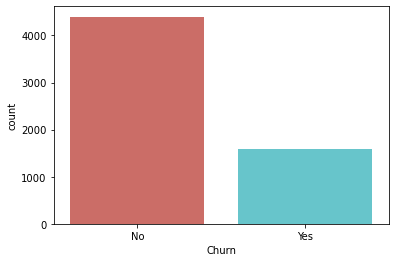

No     0.734881
Yes    0.265119
Name: Churn, dtype: float64


In [93]:
#distribution of dependent variable Churn
sns.countplot(x = 'Churn', data = df, palette = 'hls')
plt.show()

print(df['Churn'].value_counts(normalize = True))

We can see from the image above that the dependent variable is imbalanced. However, this imbalance will only make the intercept biased, but all the other model coefficients will be unbiased. This is discussed in more detail in [this ResearchGate question](https://www.researchgate.net/post/Is_it_a_problem_have_a_unbalanced_dependent_variable_in_logit_models) 

In [133]:
######################## Train the model ########################

log_reg = LogisticRegression() #make instance of model 
log_reg.fit(X_train_sel.fillna(0), y_train.values.ravel()) #train model 

######################## Measure performance of the model ########################

score = log_reg.score(X_test_sel.fillna(0), y_test)
print(score)


0.8038397328881469
C:\Users\Rodrigo Silva\anaconda3\envs\isye6740\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Naive Bayes

In [ ]:
######################## Train the model ########################

log_reg = LogisticRegression() #make instance of model 
log_reg.fit(X_train_sel, y_train) #train model 

######################## Measure performance of the model ########################

# Support Vector Machine (SVM)

In [ ]:
######################## Train the model ########################

log_reg = LogisticRegression() #make instance of model 
log_reg.fit(X_train_sel, y_train) #train model 

######################## Measure performance of the model ########################

# Random Forest

In [ ]:
######################## Train the model ########################

log_reg = LogisticRegression() #make instance of model 
log_reg.fit(X_train_sel, y_train) #train model 

######################## Measure performance of the model ########################

# Neural Network

In [ ]:
######################## Train the model ########################

log_reg = LogisticRegression() #make instance of model 
log_reg.fit(X_train_sel, y_train) #train model 

######################## Measure performance of the model ########################

# Compare models